In [4]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [5]:
def _pick_number(prob: float) -> str:
    choices = [0, 1]
    probabilities = [1 - prob, prob]
    return random.choices(choices, weights=probabilities)[0]

In [6]:
def _generate_random(mean:int, sd:int) -> int:
    random_number = np.abs(np.random.normal(mean, sd))
    return int(random_number)

In [15]:
def generate_random_arr(rows, prob, mean:int=400, sd:int=80) -> list:
    arr = []
    count = 0
    while count < rows:
        val = _pick_number(prob)
        n = _generate_random(mean, sd)
        arr.extend([val for i in range (n)])
        count += n
    return arr[:rows]

In [16]:
def generate_worker_df(worker_id: int, worker_settings: dict) -> pd.DataFrame:
    start = datetime(2023, 5, 1, 9, 0, 0)
    end = datetime(2023, 5, 1, 18, 0, 0)
    num_rows = (start-end).seconds // 5
    df_dict = {"timestamp": [], "worker_id": [], "ppe": [], "danger": [], "safety_harness": []}
    
    # Generate timestamp
    curr = start
    for i in range(num_rows):
        df_dict["timestamp"].append(curr)
        curr += timedelta(seconds=5)

    # Generate worker_id
    df_dict["worker_id"] = [worker_id for i in range(num_rows)]

    # Generate ppe, danger, safety_harness
    df_dict["ppe"] = generate_random_arr(num_rows, worker_settings["prob_ppe"])
    df_dict["danger"] = generate_random_arr(num_rows, worker_settings["prob_danger"])
    df_dict["safety_harness"] = generate_random_arr(num_rows, worker_settings["prob_safety_harness"])

    df = pd.DataFrame(df_dict)
    return df

In [17]:
worker_settings_dict = {
    1: {
        "prob_ppe": 0.8,
        "prob_danger": 0.2,
        "prob_safety_harness": 0.1,
    },
    2: {
        "prob_ppe": 0.6,
        "prob_danger": 0.8,
        "prob_safety_harness": 0.4,
    },
    3: {
        "prob_ppe": 0.95,
        "prob_danger": 0.8,
        "prob_safety_harness": 0.05,
    }
}

In [18]:
# Generate data
all_df = None
for worker_id, worker_settings in worker_settings_dict.items():
    worker_df = generate_worker_df(worker_id, worker_settings)
    all_df = worker_df if all_df is None else pd.concat([all_df, worker_df], axis=0, ignore_index=True)

In [27]:
# Check df
all_df

,timestamp,worker_id,ppe,danger,safety_harness
0,2023-05-01 09:00:00,1,1,0,0
1,2023-05-01 09:00:05,1,1,0,0
2,2023-05-01 09:00:10,1,1,0,0
3,2023-05-01 09:00:15,1,1,0,0
4,2023-05-01 09:00:20,1,1,0,0
...,...,...,...,...,...
32395,2023-05-01 23:59:35,3,1,1,0
32396,2023-05-01 23:59:40,3,1,1,0
32397,2023-05-01 23:59:45,3,1,1,0
32398,2023-05-01 23:59:50,3,1,1,0


In [28]:
# Save df
all_df.to_csv("data/file.csv")

<Axes: >

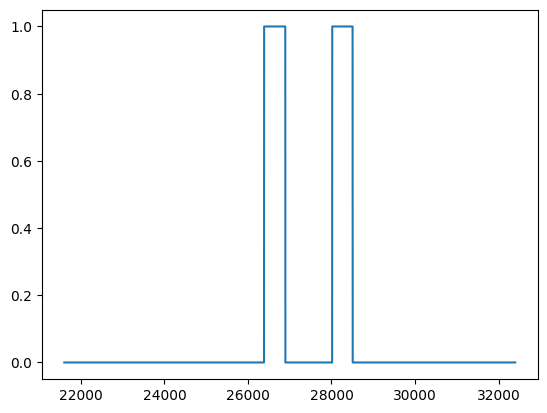

In [45]:
# Visualize
all_df[all_df["worker_id"]==3]["ppe"].apply(lambda x: int(1 - x)).plot()